In [471]:
# Write your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [472]:
coffee_data = pd.read_csv("data/merged_data_cleaned.csv")

In [473]:
coffee_data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [474]:
coffee_data.shape

(1339, 44)

In [475]:
coffee_data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [476]:
coffee_data.rename(columns={"Unnamed: 0": "index"}, inplace=True)
new_column_names = []

for name in coffee_data.columns:
    new_name = name.replace(".", "_").lower()
    new_column_names.append(new_name)

coffee_data.columns = new_column_names

coffee_data.columns

Index(['index', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [477]:
coffee_data["bag_weight"].to_string()

'0          60 kg\n1          60 kg\n2              1\n3          60 kg\n4          60 kg\n5          30 kg\n6          69 kg\n7          60 kg\n8          60 kg\n9          60 kg\n10         60 kg\n11          1 kg\n12          1 kg\n13             1\n14         60 kg\n15          1 kg\n16      2 kg,lbs\n17             6\n18         60 kg\n19         60 kg\n20          1 kg\n21         3 lbs\n22          1 kg\n23          1 kg\n24         60 kg\n25         60 kg\n26             6\n27         60 kg\n28         69 kg\n29         50 kg\n30             6\n31         60 kg\n32         60 kg\n33         2 lbs\n34         60 kg\n35          1 kg\n36       100 lbs\n37       100 lbs\n38             6\n39          1 kg\n40          1 kg\n41         60 kg\n42         60 kg\n43         15 kg\n44         60 kg\n45         60 kg\n46         60 kg\n47          2 kg\n48          1 kg\n49         60 kg\n50             6\n51             2\n52         69 kg\n53         60 kg\n54         70 kg\n55       

In [478]:
## As the majority of the entries seem to be in kilograms, we will assume the unspecified vavlues are also in kilograms
## Any values containing 'lbs' or 'kg, lbs' will be removed

bag_weight_list = coffee_data["bag_weight"].tolist()

for i in range(len(coffee_data["bag_weight"])):
    if 'lbs' in coffee_data.bag_weight[i]:
        coffee_data = coffee_data.drop(index = i)
    elif 'kg' in coffee_data.bag_weight[i]:
        coffee_data.loc[coffee_data.index == i, 'bag_weight'] = coffee_data.bag_weight[i][:-3]

In [479]:
coffee_data.shape

(1223, 44)

In [480]:
coffee_data.bag_weight.astype(int)

0       60
1       60
2        1
3       60
4       60
        ..
1332     2
1333     1
1334     2
1335     2
1336     1
Name: bag_weight, Length: 1223, dtype: int32

In [481]:
coffee_data = coffee_data.reset_index()
coffee_data = coffee_data.drop('level_0', axis=1)

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [482]:
## coffee_data_valid_harvest_years = coffee_data[coffee_data.harvest_year.str.is_numeric() == True]

for i in range(len(coffee_data["harvest_year"])):
    if str(coffee_data.harvest_year[i]).isnumeric() == False:
        coffee_data = coffee_data.drop(index=i)

In [483]:
coffee_data.harvest_year.astype(int)

0       2014
1       2014
3       2014
4       2014
5       2013
        ... 
1218    2013
1219    2012
1220    2016
1221    2016
1222    2014
Name: harvest_year, Length: 1039, dtype: int32

In [484]:
coffee_data = coffee_data.reset_index()
coffee_data = coffee_data.drop('level_0', axis=1)
coffee_data = coffee_data.drop('index', axis=1)

In [485]:
pd.to_datetime(coffee_data.grading_date, format='mixed')

0      2015-04-04
1      2015-04-04
2      2015-03-26
3      2015-04-04
4      2013-09-03
          ...    
1034   2013-06-20
1035   2012-02-29
1036   2016-01-19
1037   2016-01-19
1038   2014-12-23
Name: grading_date, Length: 1039, dtype: datetime64[ns]

In [486]:
pd.to_datetime(coffee_data.expiration, format='mixed')

0      2016-04-03
1      2016-04-03
2      2016-03-25
3      2016-04-03
4      2014-09-03
          ...    
1034   2014-06-20
1035   2013-02-28
1036   2017-01-18
1037   2017-01-18
1038   2015-12-23
Name: expiration, Length: 1039, dtype: datetime64[ns]

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [487]:
sum_unkown_countries_of_origin = coffee_data.country_of_origin.isna().sum()
print(sum_unkown_countries_of_origin)

0


In [488]:
## No unkown countries of origin detected; If there were, dropna() would have been used to remove the respective rows

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [489]:
for i in range(len(coffee_data["owner"])):
    if str(coffee_data.owner[i]).lower() != str(coffee_data.owner_1[i]).lower():
        print(f'row - {i}; owner - {coffee_data.owner[i]}; owner 2 - {coffee_data.owner_1[i]}')

row - 164; owner - ceca, s.a.; owner 2 - CECA,S.A.
row - 713; owner - lin, che-hao krude 林哲豪; owner 2 - Lin, Che-Hao Krude 林哲豪



In [490]:
## As the casing is the only real difference between the two owner columns, we will dispose of the "owner" column
## We will then rename the "owner_1" column "owner" for clarity

coffee_data = coffee_data.drop('owner', axis=1)
coffee_data.rename(columns={'owner_1': 'owner'}, inplace=True)
coffee_data.owner

0                 metad plc
1                 metad plc
2       Yidnekachew Dabessa
3                 metad plc
4                 Ji-Ae Ahn
               ...         
1034          Andrew Hetzel
1035          Andrew Hetzel
1036            Luis Robles
1037            Luis Robles
1038            James Moore
Name: owner, Length: 1039, dtype: object

In [491]:
coffee_data.producer

0                                   METAD PLC
1                                   METAD PLC
2       Yidnekachew Dabessa Coffee Plantation
3                                   METAD PLC
4                                         NaN
                        ...                  
1034                           Nishant Gurjer
1035                       Sethuraman Estates
1036            Café Robusta del Ecuador S.A.
1037            Café Robusta del Ecuador S.A.
1038                             Cafe Cazengo
Name: producer, Length: 1039, dtype: object

In [492]:
for i in range(len(coffee_data["owner"])):
    if str(coffee_data.owner[i]).lower() != str(coffee_data.producer[i]).lower():
        print(f'row - {i}; owner - {coffee_data.owner[i]}; producer - {coffee_data.producer[i]}')

row - 2; owner - Yidnekachew Dabessa; producer - Yidnekachew Dabessa Coffee Plantation
row - 4; owner - Ji-Ae Ahn; producer - nan
row - 5; owner - Hugo Valdivia; producer - HVC
row - 7; owner - Mohammed Lalo; producer - Fahem Coffee Plantation
row - 8; owner - CQI Q Coffee Sample Representative; producer - Alfredo De Jesús López Pérez
row - 9; owner - CQI Q Coffee Sample Representative; producer - Jorge Walter Restrepo
row - 10; owner - CQI Q Coffee Sample Representative; producer - María Leticia Diosa
row - 11; owner - Yunnan Coffee Exchange; producer - Echo Coffee
row - 12; owner - EssenceCoffee; producer - LevelUp
row - 13; owner - CQI Q Coffee Sample Representative; producer - Nicolás Rueda Urrego
row - 15; owner - CQI Q Coffee Sample Representative; producer - Silvia Elena Higuita
row - 16; owner - Ji-Ae Ahn; producer - nan
row - 17; owner - NUCOFFEE; producer - Ralph Junqueira
row - 19; owner - Bismarck Castro; producer - Reinerio Zepeda
row - 20; owner - Lin, Che-Hao Krude 林哲豪; 

In [493]:
## While owner and producer names do coincide, they are often different. We will therefore keep the producer column

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [494]:
coffee_data.color.unique()

array(['Green', 'Bluish-Green', nan, 'Blue-Green'], dtype=object)

In [495]:
coffee_data.country_of_origin.unique()

array(['Ethiopia', 'Brazil', 'Peru', 'United States', 'China', 'Mexico',
       'Uganda', 'Honduras', 'Taiwan', 'Tanzania, United Republic Of',
       'Kenya', 'Thailand', 'Colombia', 'Guatemala', 'Panama',
       'Papua New Guinea', 'El Salvador', 'Indonesia', 'Costa Rica',
       'Nicaragua', 'United States (Hawaii)', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Haiti', 'Mauritius', 'Cote d?Ivoire', 'India', 'Ecuador'],
      dtype=object)

In [534]:
## As there are many more countries than colors, we will make each color a seperate column in our new table
color_data = coffee_data.groupby(['color', 'country_of_origin']).size().unstack(fill_value=0)
color_data = color_data.T
color_data

color,Blue-Green,Bluish-Green,Green
country_of_origin,,,
Brazil,12,8,40
Colombia,8,7,103
Costa Rica,8,6,23
Ecuador,2,0,0
El Salvador,2,2,9
Guatemala,2,4,157
Haiti,1,0,1
Honduras,3,1,45
India,1,2,9


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

<function matplotlib.pyplot.show(close=None, block=None)>

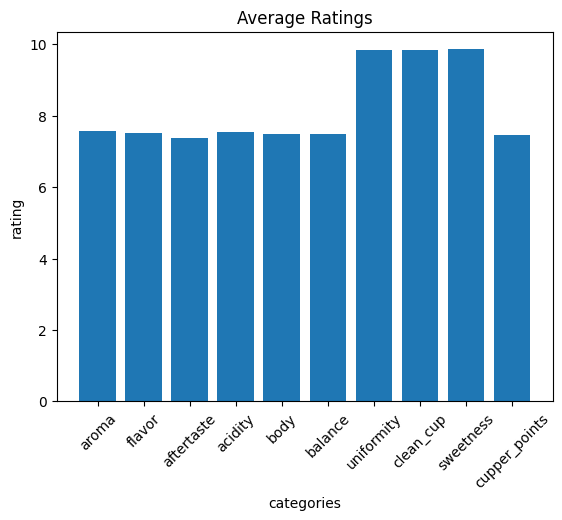

In [544]:
## We will leave total_cup_points out for now, as that is a scroe out of 100 rather than 10

all_rating_columns = coffee_data.columns.tolist()[18:28]
all_rating_means = [coffee_data.loc[:, col].mean() for col in all_rating_columns]

plt.bar(all_rating_columns, all_rating_means)
plt.title('Average Ratings')
plt.xlabel('categories')
plt.ylabel('rating')
plt.xticks(rotation=45)
plt.show

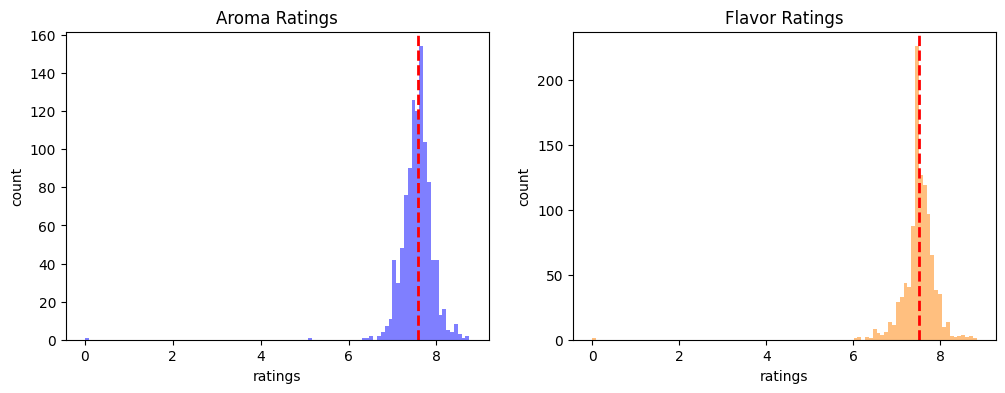

In [579]:
f, ax = plt.subplots(1, 2)
ax[0].hist(coffee_data.aroma.to_list(), bins=100, fc=(0, 0, 1, 0.5))
ax[0].set_xlabel('ratings')
ax[0].set_ylabel('count')
ax[0].set_title('Aroma Ratings')
ax[0].axvline(all_rating_means[0], color='r', linestyle='dashed', linewidth=2)
ax[1].hist(coffee_data.flavor.to_list(), bins=100, fc=(1, 0.5, 0, 0.5))
ax[1].set_xlabel('ratings')
ax[1].set_ylabel('count')
ax[1].set_title('Flavor Ratings')
ax[1].axvline(all_rating_means[1], color='r', linestyle='dashed', linewidth=2)

f.subplots_adjust(wspace=0.2, hspace=0.5)
f.set_figwidth(12)
f.set_figheight(4)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

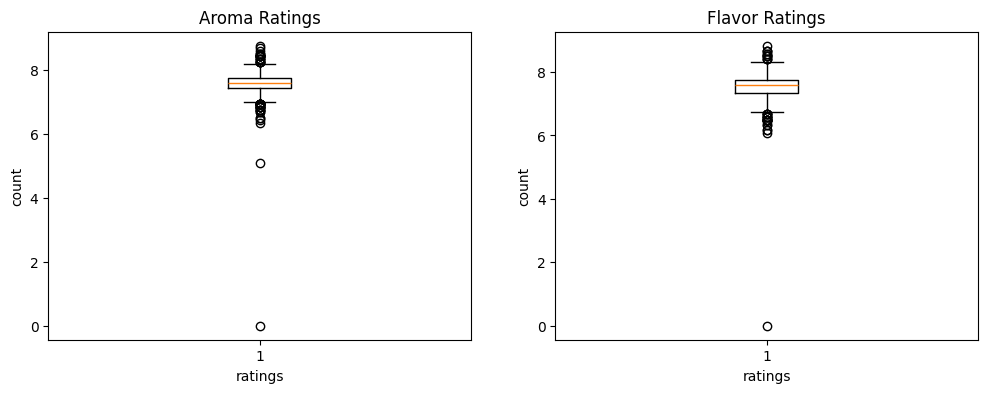

In [582]:
f, ax = plt.subplots(1, 2)
ax[0].boxplot(coffee_data.aroma.to_list())
ax[0].set_xlabel('ratings')
ax[0].set_ylabel('count')
ax[0].set_title('Aroma Ratings')
ax[1].boxplot(coffee_data.flavor.to_list())
ax[1].set_xlabel('ratings')
ax[1].set_ylabel('count')
ax[1].set_title('Flavor Ratings')

f.subplots_adjust(wspace=0.2, hspace=0.5)
f.set_figwidth(12)
f.set_figheight(4)
plt.show

In [588]:
# It seems there are two outliers in terms of the aroma ratings, one of which is also an outlier in the falvor ratings
coffee_data.loc[coffee_data.aroma < 6, ['species', 'owner', 'country_of_origin', 'aroma', 'flavor']]

,species,owner,country_of_origin,aroma,flavor
523,Arabica,Racafe & Cia S.C.A,Colombia,5.08,7.75
1012,Arabica,Bismarck Castro,Honduras,0.00,0.00


### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!